# CNN

In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
from keras.optimizers import SGD

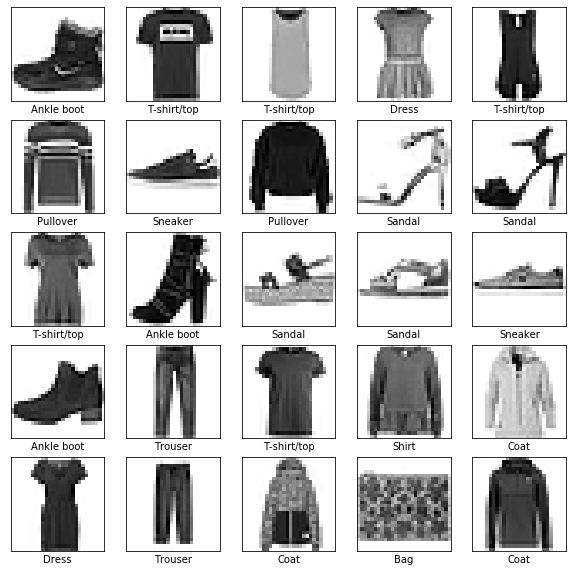

In [54]:
#import the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


#store the image class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Preprocess the data

#need to scale the values to a range 0 to 1
trainX = train_images / 255.0
testX = test_images / 255.0

 
#Display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])



In [56]:
def evaluate_model(train_images, test_images, train_labels, test_labels, model):
    #reshape the model
    train_images=train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images=test_images.reshape(test_images.shape[0], 28, 28 ,1) 

    #output of the model will be 1D vector with size 10
    #convert current representation of the labels to "One Hot Representation"
    train_labels=keras.utils.to_categorical(train_labels)
    test_labels=keras.utils.to_categorical(test_labels)



    #Compile the model
    model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                  metrics=['accuracy'])


    #Train the model
    cnn_model=model.fit(train_images, train_labels, batch_size = 512, epochs=25, verbose=1, validation_split=0.2)


    #Evaluate the accuracy
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print('Test Loss : {:.4f}'.format(test_loss))
    print('Test Accuracy : {:.4f}'.format(test_acc))


    #Make Predictions
    predictions = model.predict(test_images)
    predictions[0]
    return cnn_model 

In [58]:
def myplot(cnn_model):
    accuracy = cnn_model.history['accuracy']
    val_accuracy = cnn_model.history['val_accuracy']
    loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### Model with Dropout and ReLU activation

In [67]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.20),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.20),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1568)            

Epoch 1/25
94/94 [==============================] - 24s 250ms/step - loss: 4.0407 - accuracy: 0.6494 - val_loss: 0.5932 - val_accuracy: 0.7940
Epoch 2/25
94/94 [==============================] - 27s 287ms/step - loss: 0.6004 - accuracy: 0.7863 - val_loss: 0.4607 - val_accuracy: 0.8367
Epoch 3/25
94/94 [==============================] - 26s 275ms/step - loss: 0.4932 - accuracy: 0.8194 - val_loss: 0.4240 - val_accuracy: 0.8512
Epoch 4/25
94/94 [==============================] - 33s 352ms/step - loss: 0.4374 - accuracy: 0.8394 - val_loss: 0.3712 - val_accuracy: 0.8672
Epoch 5/25
94/94 [==============================] - 33s 354ms/step - loss: 0.4022 - accuracy: 0.8519 - val_loss: 0.3588 - val_accuracy: 0.8708
Epoch 6/25
94/94 [==============================] - 34s 366ms/step - loss: 0.3721 - accuracy: 0.8631 - val_loss: 0.3520 - val_accuracy: 0.8696
Epoch 7/25
94/94 [==============================] - 40s 421ms/step - loss: 0.3489 - accuracy: 0.8708 - val_loss: 0.3287 - val_accuracy: 0.8798

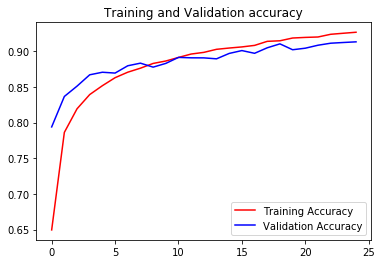

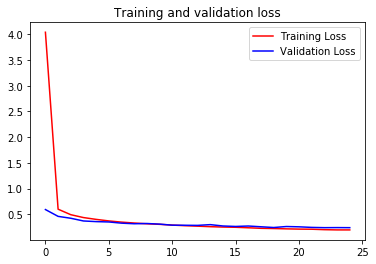

In [68]:
cnn_model = evaluate_model(train_images, test_images, train_labels, test_labels, model1)
myplot(cnn_model)

### Model with Dropout and Sigmoid activation

In [69]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='sigmoid', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.20),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='sigmoid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.20),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1568)            

Epoch 1/25
94/94 [==============================] - 29s 312ms/step - loss: 1.2460 - accuracy: 0.5766 - val_loss: 0.6478 - val_accuracy: 0.7744
Epoch 2/25
94/94 [==============================] - 27s 288ms/step - loss: 0.5920 - accuracy: 0.7876 - val_loss: 0.5151 - val_accuracy: 0.8142
Epoch 3/25
94/94 [==============================] - 27s 290ms/step - loss: 0.4975 - accuracy: 0.8189 - val_loss: 0.4573 - val_accuracy: 0.8342
Epoch 4/25
94/94 [==============================] - 29s 310ms/step - loss: 0.4500 - accuracy: 0.8345 - val_loss: 0.4151 - val_accuracy: 0.8472
Epoch 5/25
94/94 [==============================] - 26s 281ms/step - loss: 0.4152 - accuracy: 0.8484 - val_loss: 0.3866 - val_accuracy: 0.8581
Epoch 6/25
94/94 [==============================] - 26s 281ms/step - loss: 0.3861 - accuracy: 0.8575 - val_loss: 0.3686 - val_accuracy: 0.8662
Epoch 7/25
94/94 [==============================] - 28s 293ms/step - loss: 0.3697 - accuracy: 0.8635 - val_loss: 0.3521 - val_accuracy: 0.8704

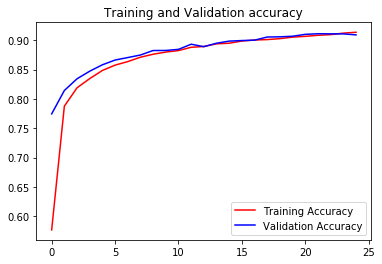

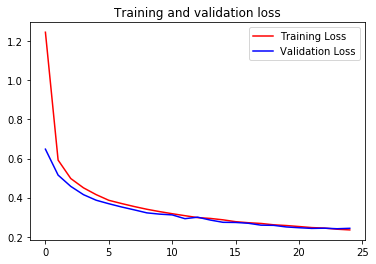

In [70]:
cnn_model = evaluate_model(train_images, test_images, train_labels, test_labels, model2)
myplot(cnn_model)

### Model without Dropout and Sigmoid activation

In [63]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='sigmoid', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='sigmoid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

Epoch 1/25
94/94 [==============================] - 22s 235ms/step - loss: 1.2698 - accuracy: 0.5750 - val_loss: 0.6711 - val_accuracy: 0.7543
Epoch 2/25
94/94 [==============================] - 25s 268ms/step - loss: 0.5855 - accuracy: 0.7892 - val_loss: 0.5399 - val_accuracy: 0.7941
Epoch 3/25
94/94 [==============================] - 29s 309ms/step - loss: 0.4810 - accuracy: 0.8267 - val_loss: 0.4562 - val_accuracy: 0.8332
Epoch 4/25
94/94 [==============================] - 28s 302ms/step - loss: 0.4217 - accuracy: 0.8489 - val_loss: 0.3987 - val_accuracy: 0.8574
Epoch 5/25
94/94 [==============================] - 27s 285ms/step - loss: 0.3779 - accuracy: 0.8652 - val_loss: 0.3770 - val_accuracy: 0.8646
Epoch 6/25
94/94 [==============================] - 27s 289ms/step - loss: 0.3512 - accuracy: 0.8743 - val_loss: 0.3415 - val_accuracy: 0.8749
Epoch 7/25
94/94 [==============================] - 31s 326ms/step - loss: 0.3310 - accuracy: 0.8811 - val_loss: 0.3235 - val_accuracy: 0.8827

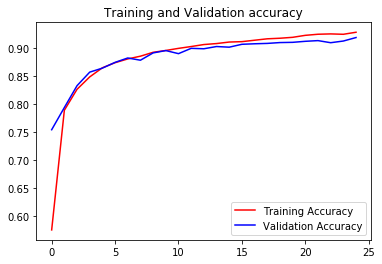

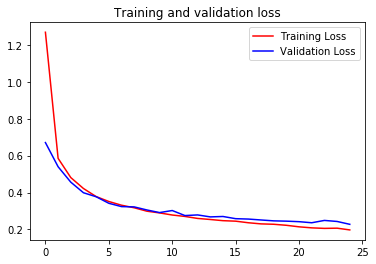

In [64]:
cnn_model = evaluate_model(train_images, test_images, train_labels, test_labels, model3)
myplot(cnn_model)

### Model without Dropout and ReLU activation

In [65]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

Epoch 1/25
94/94 [==============================] - 24s 256ms/step - loss: 3.4903 - accuracy: 0.7250 - val_loss: 0.4476 - val_accuracy: 0.8405
Epoch 2/25
94/94 [==============================] - 26s 280ms/step - loss: 0.3645 - accuracy: 0.8691 - val_loss: 0.3591 - val_accuracy: 0.8733
Epoch 3/25
94/94 [==============================] - 26s 275ms/step - loss: 0.2903 - accuracy: 0.8930 - val_loss: 0.3177 - val_accuracy: 0.8879
Epoch 4/25
94/94 [==============================] - 25s 267ms/step - loss: 0.2510 - accuracy: 0.9074 - val_loss: 0.3076 - val_accuracy: 0.8901
Epoch 5/25
94/94 [==============================] - 27s 286ms/step - loss: 0.2186 - accuracy: 0.9191 - val_loss: 0.3192 - val_accuracy: 0.8896
Epoch 6/25
94/94 [==============================] - 23s 246ms/step - loss: 0.1985 - accuracy: 0.9258 - val_loss: 0.3117 - val_accuracy: 0.8938
Epoch 7/25
94/94 [==============================] - 23s 249ms/step - loss: 0.1775 - accuracy: 0.9354 - val_loss: 0.2931 - val_accuracy: 0.8971

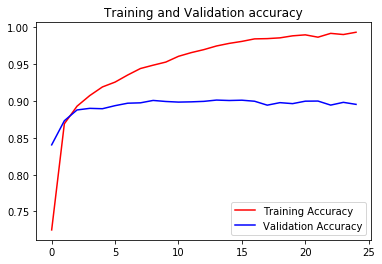

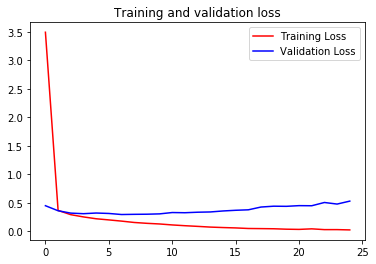

In [66]:
cnn_model = evaluate_model(train_images, test_images, train_labels, test_labels, model4)
myplot(cnn_model)

## Results:

#### Model with ReLU activation function and Dropout:
   * Test Loss : 0.2579
   * Test Accuracy : 0.9079
   
#### Model with ReLU activation function and without Dropout:
   * Test Loss : 0.5645
   * Test Accuracy : 0.8967
   
#### Model with Sigmoid activation function and Dropout:
   * Test Loss : 0.2551
   * Test Accuracy : 0.9061
   
#### Model with Sigmoid activation function and without Dropout:
   * Test Loss : 0.2412
   * Test Accuracy : 0.9124
        
    

According to the diagrams and results, it seems that the use of the Dropout layer prevents overfitting and the train and validation diagrams become closer to each other, while it improves the resluts of "ReLU function", it has an bad effect on "sigmoid function". According to these observations, the sigmoid activation function gives better results and seems more appropriate.

sharare zolghadr (610395109)